<a href="https://colab.research.google.com/github/joseangelooliveira-br/Python3/blob/main/dados_univesp_comentados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Instalando o Arrow (caso você rode no Google Colab)
!pip install arrow

     |████████████████████████████████| 61kB 2.9MB/s 


In [4]:
# Lendo as bibliotecas
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
import numpy as np
import pandas as pd
import arrow
from pandas import json_normalize
import json
import glob
import matplotlib.pyplot as plt

In [5]:
# Definindo a funcoes para uso da API da plataforma
def get_data(application,guid,timestamp_init,timestamp_final):
    result = []
    i = 0
    lastlen=10000
    while timestamp_init < timestamp_final:
        stats = oauth.get("https://api.demo.konkerlabs.net/v1/{}/incomingEvents?q=device:{} timestamp:>{}&sort=oldest&limit=10000".format(application,guid, timestamp_init)).json()['result']
        if (len(stats)<2) and (lastlen<10000) :
            break
        timestamp_init = stats[-1]['timestamp']
        result.extend(stats)
        lastlen = len(stats)
        print(timestamp_init)
    return result

def list_devices(oauth):
    global base_api
    devices = oauth.get("https://api.demo.konkerlabs.net/v1/{}/devices/?size=5000".format(application)).json()['result']
    return devices

In [6]:
# Inserindo os dados da conta na plataforma (importante não passar esse notebook para pessoas externas)
base_api = 'https://api.demo.konkerlabs.net'
application = 'univesp'
username = "data@univesp.br"
password = 'FYCzR3JAH6qn6xu6'

In [7]:
# Autenticando e pegando o token de acesso a conta
client = BackendApplicationClient(client_id=username)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(token_url='{}/v1/oauth/token'.format(base_api),client_id=username,client_secret=password)

In [8]:
# Listando os dispositivos dessa conta.
# Cada dispositivo possuí um sensor DHT22 e está localizado em um dos polos da Univesp.
# Existem dispositivos que não tem dados, pois nunca foram ligados, bem como alguns com dados intermitentes, que funcionam
# por um período e estão desligados por outros.
dev_list = list_devices(oauth)

In [9]:
# Vamos olhar agora os metadados de dispositivos.
dev_list

[{'active': True,
  'debug': False,
  'description': 'DHT22',
  'deviceModelName': 'S8V02',
  'guid': '60e55023-91a9-4e85-b49c-e732b5e69318',
  'id': 'S8V0200A0B4B7',
  'locationName': 'default',
  'name': 'S8V0200A0B4B7-DHT22',
  'tags': []},
 {'active': True,
  'debug': False,
  'description': 'DHT22',
  'deviceModelName': 'S8V02',
  'guid': 'a5fee9c9-5cf6-4e60-9349-7476a702cf74',
  'id': 'S8V0200A43F4B',
  'locationName': 'default',
  'name': 'S8V0200A43F4B-DHT22',
  'tags': []},
 {'active': True,
  'debug': False,
  'description': 'DHT22',
  'deviceModelName': 'S8V02',
  'guid': '893985e8-77a8-482b-bc0d-04d22b4752e7',
  'id': 'S8V0200839C0F',
  'locationName': 'default',
  'name': 'S8V0200839C0F-DHT22',
  'tags': []},
 {'active': True,
  'debug': False,
  'description': 'DHT22',
  'deviceModelName': 'S8V02',
  'guid': '2663ba7f-12bc-4907-8239-17651b6896ec',
  'id': 'S8V02009B1E56',
  'locationName': 'default',
  'name': 'S8V02009B1E56-DHT22',
  'tags': []},
 {'active': True,
  'deb

In [11]:
# Todos os dispositivos são identificados na plataforma pelo seu guid.
# Essa é a informação que você deve usar para baixar os dados de um dispositivo único
# Vamos examinar o dispositivo S8V0200A0B4B7 que está em São Paulo (-23.554597,-46.7333)
guid = '60e55023-91a9-4e85-b49c-e732b5e69318'

In [12]:
# Vamos dar uma olhada nos dados desse dispositivo no mês de junho e julho
data_inicial = '2020-06-01T00:00:00.000000'
data_final = '2020-08-01T00:00:00.000000'
dev_data = get_data(application, guid, data_inicial , data_final)
stats_df = json_normalize(dev_data).set_index('timestamp')
stats_df.index = pd.to_datetime(stats_df.index)
stats_df.index = stats_df.index.tz_convert('America/Sao_Paulo')

2020-06-06T18:02:45.104Z
2020-06-12T11:02:49.573Z
2020-06-19T09:46:43.374Z
2020-07-16T21:40:49.774Z
2020-08-09T11:32:24.295Z


In [13]:
stats_df

,ingestedTimestamp,incoming.deviceGuid,incoming.channel,payload.temperature,payload.humidity,payload.info.mac,payload.info.net,payload.info.ip,payload.info.rssi,payload.errors.connection,payload.errors.pub,payload
timestamp,,,,,,,,,,,,
2020-05-31 21:00:29.130000-03:00,2020-06-01T00:00:29.130Z,60e55023-91a9-4e85-b49c-e732b5e69318,data,22.1,44.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31 21:01:31.232000-03:00,2020-06-01T00:01:31.232Z,60e55023-91a9-4e85-b49c-e732b5e69318,data,22.0,44.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31 21:02:29.123000-03:00,2020-06-01T00:02:29.123Z,60e55023-91a9-4e85-b49c-e732b5e69318,data,22.0,44.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31 21:02:40.755000-03:00,2020-06-01T00:02:40.755Z,60e55023-91a9-4e85-b49c-e732b5e69318,_health,NaN,NaN,18:FE:34:A0:B4:B7,UNIVESP,172.16.0.69,-67.0,1.0,18991.0,NaN
2020-05-31 21:03:29.123000-03:00,2020-06-01T00:03:29.123Z,60e55023-91a9-4e85-b49c-e732b5e69318,data,22.0,44.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-09 08:28:24.291000-03:00,2020-08-09T11:28:24.291Z,60e55023-91a9-4e85-b49c-e732b5e69318,data,24.1,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-09 08:29:24.291000-03:00,2020-08-09T11:29:24.291Z,60e55023-91a9-4e85-b49c-e732b5e69318,data,24.1,51.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-09 08:30:26.920000-03:00,2020-08-09T11:30:26.920Z,60e55023-91a9-4e85-b49c-e732b5e69318,data,24.1,51.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Vamos agora examinar os dados do dispositivo:
stats_df.groupby(['incoming.channel']).count()


,ingestedTimestamp,incoming.deviceGuid,payload.temperature,payload.humidity,payload.info.mac,payload.info.net,payload.info.ip,payload.info.rssi,payload.errors.connection,payload.errors.pub,payload
incoming.channel,,,,,,,,,,,
_health,19384,19384,0,0,19384,19384,19384,19384,19384,19384,0
_networks,1615,1615,0,0,0,0,0,0,0,0,1615
data,29001,29001,29001,29001,0,0,0,0,0,0,0


In [ ]:
# Os dispositivos tem 3 canais de dados independentes. 
# _health: envia os dados com relação a rede a qual o dispositivo está conectado e sobre os erros de leitura e envio dos dados;
# _networks: envia os dados com relação as redes wifi visíveis para o dispositivo (usado para reconstrução da posição);
# data: envia os dados de temperatura e umidade medidos pelo DHT22.
# Esses dados são gerados por processos distintos rodando no ESP8266, logo podem falhar de forma independente.
# Você vai notar que o DHT22 tem um índice de falha relativamente alto os dados dele não vão estar disponíveis em todo o intervalo.

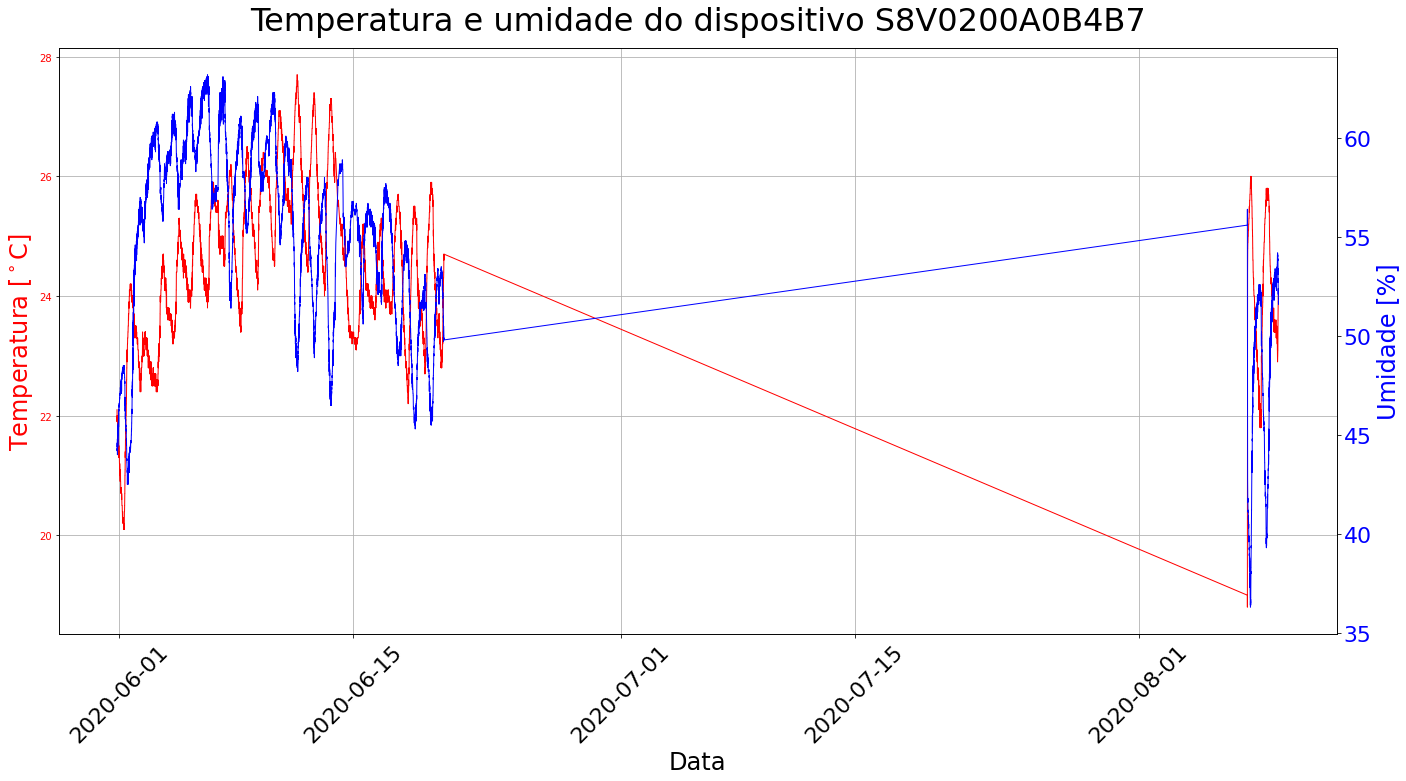

In [15]:
# Vamos agora dar uma olhada nos dados de temperatura e umidade
fig, ax1 = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.gca().xaxis_date('America/Sao_Paulo')
plt.rcParams['timezone'] = 'America/Sao_Paulo'
plt.title('Temperatura e umidade do dispositivo S8V0200A0B4B7', size=32,y=1.02)
ax1.plot(stats_df[stats_df['incoming.channel']=='data']['payload.temperature'], color='red',alpha=1, linewidth=1)
ax1.set_ylabel('Temperatura [$^\circ$C]', size=24, color = 'red')
ax1.set_xlabel('Data', size=24)
plt.grid()
for tl in ax1.get_yticklabels():
    tl.set_color('r')
    fig.tight_layout()
labels = ax1.get_xticklabels()
ax2 = ax1.twinx()
ax2.plot(stats_df[stats_df['incoming.channel']=='data']['payload.humidity'], color='blue', linewidth=1)
ax2.set_ylabel('Umidade [%]', size=24, color = 'blue')
for tl in ax2.get_yticklabels():
    tl.set_color('b')
fig.tight_layout()
labels = ax1.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=22)
plt.show()


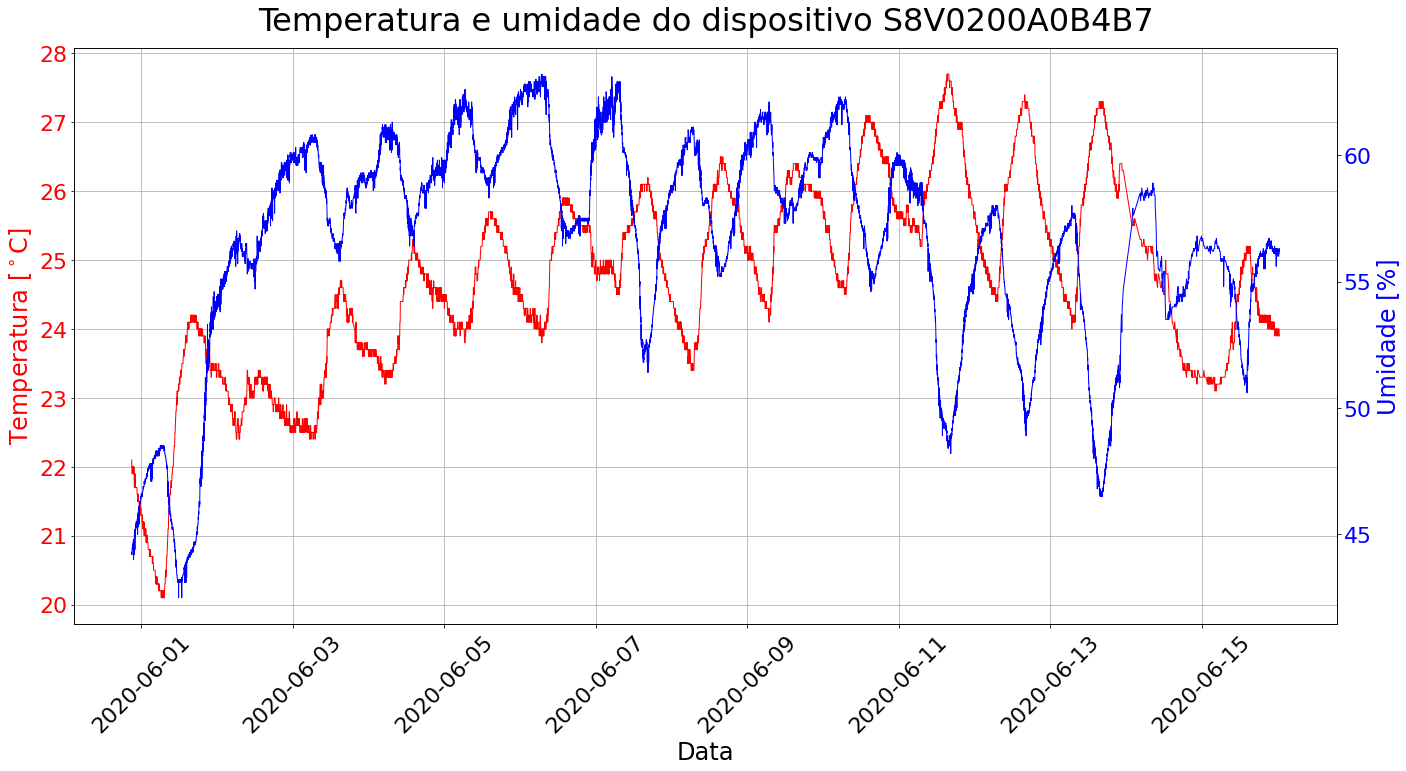

In [16]:
# No gráfico acima é possível observar um gap nos dados de mais de 30 dias.
# Vamos olhar apenas as primeiras semanas do gráfico:

# Vamos agora dar uma olhada nos dados de temperatura e umidade
fig, ax1 = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.gca().xaxis_date('America/Sao_Paulo')
plt.rcParams['timezone'] = 'America/Sao_Paulo'
plt.title('Temperatura e umidade do dispositivo S8V0200A0B4B7', size=32,y=1.02)
ax1.plot(stats_df[stats_df['incoming.channel']=='data']['payload.temperature'][:20000], color='red',alpha=1, linewidth=1)
ax1.set_ylabel('Temperatura [$^\circ$C]', size=24, color = 'red')
ax1.set_xlabel('Data', size=24)
plt.grid()
for tl in ax1.get_yticklabels():
    tl.set_color('r')
    fig.tight_layout()
labels = ax1.get_xticklabels()
ax2 = ax1.twinx()
ax2.plot(stats_df[stats_df['incoming.channel']=='data']['payload.humidity'][:20000], color='blue', linewidth=1)
ax2.set_ylabel('Umidade [%]', size=24, color = 'blue')
for tl in ax2.get_yticklabels():
    tl.set_color('b')
fig.tight_layout()
labels = ax1.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=22)
plt.show()
